In [1]:
from matplotlib import animation
from matplotlib.image import imread
from matplotlib import pyplot as plt
from numpy.linalg import eig
import numpy as np

In [2]:
goat = imread('Diego.jpeg')
print(type(goat))

<class 'numpy.ndarray'>


In [30]:
goat.shape

(1995, 1361, 3)

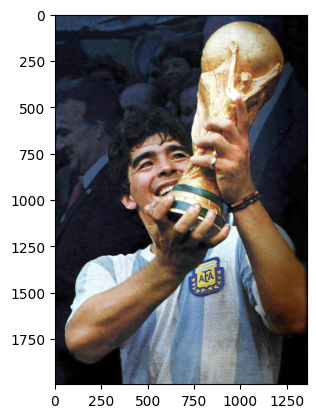

In [3]:
plt.imshow(goat)
plt.show()

In [4]:
goat.shape

(1995, 1361, 3)

In [5]:
diego_red = goat[:,:,0]
diego_green = goat[:,:,1]
diego_blue = goat[:,:,2]

## Just to avoid overfloat
diego_red = diego_red / 255 
diego_green = diego_green / 255
diego_blue = diego_blue / 255

In [6]:
def SVD_unicolor(unicolor_diego):
    U = ((unicolor_diego.T)@unicolor_diego)

    #They are already sorted    
    eigenvalues, eigenvectors = eig(U)

    return eigenvalues, eigenvectors

# Refactor to use some like this
def SVD(goat):
    
    diego_red = goat[:,:,0]
    diego_green = goat[:,:,1]
    diego_blue = goat[:,:,2]
    
    eigenvalues_red, eigenvectors_red = SVD_unicolor(diego_red)
    eigenvalues_green, eigenvectors_green = SVD_unicolor(diego_green)
    eigenvalues_blue, eigenvectors_blue = SVD_unicolor(diego_blue)
    
    return {
        'red': {
          'eigenvalues':   eigenvalues_red,
          'eigenvectors': eigenvectors_red,
        },
        'blue':{
          'eigenvalues':   eigenvalues_blue,
          'eigenvectors': eigenvectors_blue,
        },
        'green': {
          'eigenvalues':   eigenvalues_green,
          'eigenvectors': eigenvectors_green,
        }
    }

eigenvalues_red, eigenvectors_red = SVD_unicolor(diego_red)
eigenvalues_green, eigenvectors_green = SVD_unicolor(diego_green)
eigenvalues_blue, eigenvectors_blue = SVD_unicolor(diego_blue)

In [7]:
#They must be possitive to avoid overflow
(eigenvalues_red.min(),eigenvalues_green.min(),eigenvalues_blue.min())

(0.00012396655981479932, 0.00012158884727385255, 0.00013173702911123454)

In [11]:
(diego_red@(eigenvect_red.reshape(-1,1))).shape

(1995, 1)

In [12]:
eigenvect_red.shape

(1361,)

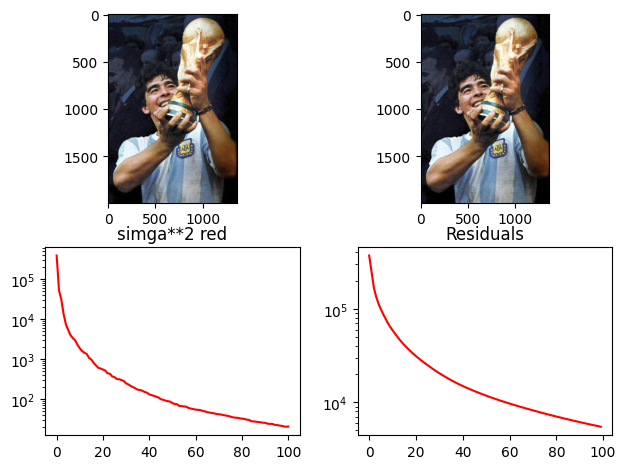

In [8]:
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2)

plt.tight_layout()
ax3.set_yscale('log')
ax4.set_yscale('log')

frames = []
residuals = []

maradona = np.zeros( goat.shape)
diego_red_being_reconstructed = np.zeros( goat.shape[0:2])
diego_green_being_reconstructed = np.zeros( goat.shape[0:2])
diego_blue_being_reconstructed = np.zeros( goat.shape[0:2])

for j in range(100):
    
    eigenvect_red = eigenvectors_red[:,j]
    eigenvect_green = eigenvectors_green[:,j]
    eigenvect_blue =  eigenvectors_blue[:,j]
    
    V1_red = diego_red@(eigenvect_red.reshape(-1,1))
    V2_red = eigenvect_red.reshape(1,-1)
    
    V1_green = diego_green@(eigenvect_green.reshape(-1,1))
    V2_green = eigenvect_green.reshape(1,-1)
    
    V1_blue = diego_blue@(eigenvect_blue.reshape(-1,1))
    V2_blue = eigenvect_blue.reshape(1,-1)
    
    diego_red_being_reconstructed += (V1_red@V2_red)
    diego_green_being_reconstructed += (V1_green@V2_green)
    diego_blue_being_reconstructed += (V1_blue@V2_blue)
        
    partial_maradona = np.array([
        diego_red_being_reconstructed,
        diego_green_being_reconstructed,
        diego_blue_being_reconstructed
    ])[:]

    partial_maradona = np.swapaxes(np.swapaxes(partial_maradona,0,1),1,2)
    
    partial_maradona_plot = partial_maradona[:]
    partial_maradona_plot[partial_maradona_plot < 0] = 0
    partial_maradona_plot[partial_maradona_plot >1] = 1    

    
    residuals.append(((goat/255 - partial_maradona)**2).sum())
    
    ax3.title.set_text('simga**2 red')
    ax4.title.set_text('Residuals')
    
    image_partial_diego = ax1.imshow(partial_maradona_plot, animated=True)
    image_diego = ax2.imshow(goat, cmap='gray', animated=True)
    
    image_eigenvalues = ax3.plot(eigenvalues_red[:j+2], c = 'r')[0]
    image_residuals = ax4.plot(residuals, c = 'r')[0]
    
    frames.append([image_partial_diego,image_diego,image_eigenvalues, image_residuals ])
    
    ani = animation.ArtistAnimation(fig, frames, interval=500, blit=True,
                                repeat_delay=1000)
    
    
writergif = animation.PillowWriter(fps=10)
ani.save('filename.gif',writer=writergif)

In [18]:
100*(goat.shape[1] + goat.shape[0])

335600

In [24]:
goat.shape[1] * goat.shape[0]

2715195